In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Untuk mengunggah file CSV dari komputer lokal
from google.colab import files
uploaded = files.upload()

# Ganti 'nama_file_anda.csv' dengan nama file CSV yang Anda unggah
df = pd.read_csv(list(uploaded.keys())[0])

print("Data berhasil dimuat")
print(df.head(6))

Saving Data kecelakaan kapal (studi basarnas) - harusnya ini 2020 sampe 2024 coba buatkan tabelnya.csv to Data kecelakaan kapal (studi basarnas) - harusnya ini 2020 sampe 2024 coba buatkan tabelnya.csv
Data berhasil dimuat
   Tahun Total Kejadian (Operasi SAR) Korban Selamat (Jiwa)  \
0   2020                          870                 4.015   
1   2021                          811                 4.811   
2   2022                          823                 5.799   
3   2023                          846                 7.855   
4   2024                          869                 5.545   
5  TOTAL                        4.219                28.025   

   Korban Meninggal Dunia (Jiwa)  Korban Hilang (Jiwa)  Total Korban  \
0                        314.000               330.000         4.659   
1                        441.000               401.000         5.653   
2                        380.000               353.000         6.532   
3                        385.000               

In [ ]:

col_response_time = 'Rata-rata Waktu Respons (Menit)'

# Langkah 1: Konversi 'Tahun' ke numerik. String 'TOTAL' akan menjadi NaN.
df_clean['Tahun'] = pd.to_numeric(df_clean['Tahun'], errors='coerce')

# Langkah 2: Hapus semua baris di mana kolom 'Tahun' bernilai NaN.
# Ini akan menghapus baris 'TOTAL' (dan baris kosong di bagian bawah data Anda)
df_clean = df_clean.dropna(subset=['Tahun']).reset_index(drop=True)

print("Baris 'TOTAL' berhasil dihapus.")
# Tampilkan informasi ringkasan (jumlah baris dan tipe data)
print("\n### 2. Informasi DataFrame (Verifikasi Jumlah Baris dan Tipe Data) ###")
df_clean.info()

Baris 'TOTAL' berhasil dihapus.

### 2. Informasi DataFrame (Verifikasi Jumlah Baris dan Tipe Data) ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tahun                            10 non-null     float64
 1   Total Kejadian (Operasi SAR)     5 non-null      float64
 2   Korban Selamat (Jiwa)            10 non-null     float64
 3   Korban Meninggal Dunia (Jiwa)    5 non-null      float64
 4   Korban Hilang (Jiwa)             5 non-null      float64
 5   Total Korban                     5 non-null      float64
 6   Rata-rata Waktu Respons (Menit)  2 non-null      float64
 7   Korban_Fatal                     5 non-null      float64
 8   Rasio_Fatalitas (%)              5 non-null      float64
dtypes: float64(9)
memory usage: 852.0 bytes


In [ ]:
# col_response_time adalah 'Rata-rata Waktu Respons (Menit)'

# Buat DataFrame baru: df_response_time
# Hapus semua baris di mana kolom 'Rata-rata Waktu Respons (Menit)' bernilai NaN.
df_response_time = df_clean.dropna(subset=[col_response_time]).reset_index(drop=True)

print("Data Respons Time yang valid:")
print(df_response_time[['Tahun', col_response_time]])

Data Respons Time yang valid:
    Tahun  Rata-rata Waktu Respons (Menit)
0  2023.0                            18.82
1  2024.0                            17.18


In [ ]:
# Hapus baris apa pun yang memiliki NaN di kolom korban
cols_korban = ['Korban Selamat (Jiwa)', 'Korban Meninggal Dunia (Jiwa)', 'Korban Hilang (Jiwa)']
df_clean_no_missing_korban = df_clean.dropna(subset=cols_korban).reset_index(drop=True)

In [ ]:
# Hitung median dari kolom korban
median_selamat = df_clean['Korban Selamat (Jiwa)'].median()

# Ganti NaN hanya di kolom tersebut dengan nilai median
df_clean['Korban Selamat (Jiwa)'] = df_clean['Korban Selamat (Jiwa)'].fillna(median_selamat)

In [ ]:
# Kolom yang menggunakan titik sebagai pemisah ribuan (berdasarkan data Anda)
cols_with_dot_separator = ['Korban Selamat (Jiwa)', 'Total Korban']

# Daftar semua kolom yang akan dikonversi ke numerik
cols_to_numeric = ['Korban Selamat (Jiwa)', 'Korban Meninggal Dunia (Jiwa)', 'Korban Hilang (Jiwa)', 'Total Korban']

# 1. Konversi Kolom Ribuan (Hilangkan Titik)
for col in cols_with_dot_separator:
    # Hilangkan titik (.) yang digunakan sebagai pemisah ribuan
    # Pastikan ini dijalankan pada df_clean, bukan df awal!
    df_clean[col] = df_clean[col].astype(str).str.replace('.', '', regex=False)

# 2. Konversi Kolom ke Numerik
for col in cols_to_numeric:
    # Konversi ke numerik. String non-angka akan menjadi NaN
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Setelah ini, baris yang tidak memiliki data valid akan menjadi NaN.
# Anda perlu menghapus baris-baris ini untuk perhitungan Rasio Fatalitas.
df_clean = df_clean.dropna(subset=['Total Korban', 'Korban Meninggal Dunia (Jiwa)', 'Korban Hilang (Jiwa)']).reset_index(drop=True)

# 3. Hitung Ulang Rasio Fatalitas (Setelah NaN dihapus)
df_clean['Korban_Fatal'] = df_clean['Korban Meninggal Dunia (Jiwa)'] + df_clean['Korban Hilang (Jiwa)']
df_clean['Rasio_Fatalitas (%)'] = (df_clean['Korban_Fatal'] / df_clean['Total Korban']) * 100

print("\n### Tabel Rasio Fatalitas Tahunan Setelah Dicleaning Ulang ###")
print(df_clean[['Tahun', 'Korban_Fatal', 'Total Korban', 'Rasio_Fatalitas (%)']].round(2))


### Tabel Rasio Fatalitas Tahunan Setelah Dicleaning Ulang ###
    Tahun  Korban_Fatal  Total Korban  Rasio_Fatalitas (%)
0  2020.0         644.0       46590.0                 1.38
1  2021.0         842.0       56530.0                 1.49
2  2022.0         733.0       65320.0                 1.12
3  2023.0         615.0        8470.0                 7.26
4  2024.0         652.0       61970.0                 1.05


# 1. 📈 Tren Total Kejadian Kecelakaan Kapal (2020-2024)


/tmp/ipython-input-967689105.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tahun', y='Total Kejadian (Operasi SAR)_numeric', data=df_plot, palette='viridis')


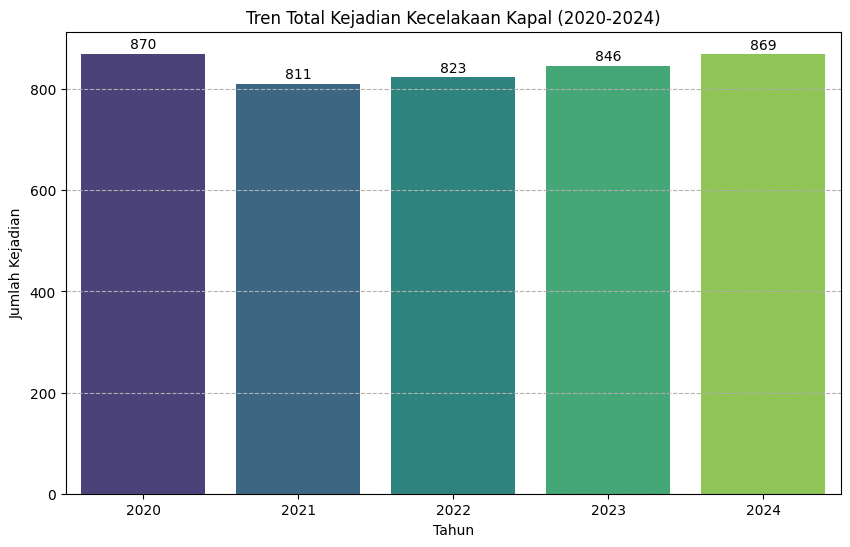

In [ ]:
# Menyiapkan grafik
plt.figure(figsize=(10, 6))

# Create a copy of the DataFrame for plotting
df_plot = df.copy()

# --- MODIFIKASI DIMULAI DI SINI ---

# 1. Konversi 'Tahun' ke numerik dan hapus baris 'TOTAL' (yang akan menjadi NaN)
df_plot['Tahun_numeric'] = pd.to_numeric(df_plot['Tahun'], errors='coerce')
df_plot = df_plot.dropna(subset=['Tahun_numeric']).reset_index(drop=True)

# 2. Konversi 'Total Kejadian (Operasi SAR)' ke numerik
# *Asumsi: Kolom ini tidak memiliki koma (,) atau titik (.) sebagai pemisah ribuan.*
# Jika kolom ini sudah bersih (hanya angka), konversi langsung:
df_plot['Total Kejadian (Operasi SAR)_numeric'] = pd.to_numeric(df_plot['Total Kejadian (Operasi SAR)'], errors='coerce')

# FIX: Drop rows where 'Total Kejadian (Operasi SAR)_numeric' is NaN
df_plot = df_plot.dropna(subset=['Total Kejadian (Operasi SAR)_numeric']).reset_index(drop=True)

# --- MODIFIKASI BERAKHIR DI SINI ---

# Gunakan kolom Tahun asli (string) untuk label x
sns.barplot(x='Tahun', y='Total Kejadian (Operasi SAR)_numeric', data=df_plot, palette='viridis')

# Menambahkan label nilai di atas bar
# Pastikan menggunakan df_plot setelah pemfilteran NaN
for index, row in df_plot.iterrows():
    # Menggunakan row['Total Kejadian (Operasi SAR)_numeric'] untuk koordinat y
    plt.text(index, row['Total Kejadian (Operasi SAR)_numeric'] + 10, int(row['Total Kejadian (Operasi SAR)_numeric']), color='black', ha="center")

plt.title('Tren Total Kejadian Kecelakaan Kapal (2020-2024)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.grid(axis='y', linestyle='--')
plt.show()

**Deskripsi Grafik:**
Grafik batang menampilkan jumlah keseluruhan insiden SAR yang ditangani Basarnas dalam kurun 2020–2024. Setiap batang merepresentasikan total kejadian per tahun.

**Temuan Utama (Insight):**
Secara umum, **jumlah insiden berada pada kisaran 800–900 kasus per tahun**, menunjukkan pola yang relatif stabil. Puncak kejadian terlihat pada tahun 2020 (870 insiden) dan 2024 (869 insiden). Konsistensi ini mengindikasikan bahwa beban operasional Basarnas dari tahun ke tahun tidak mengalami perubahan ekstrem.

***Interpretasi dan Makna Operasional:***
Stabilnya jumlah kejadian memberikan sinyal bahwa faktor eksternal yang mempengaruhi insiden—seperti aktivitas pelayaran, cuaca, atau kepadatan jalur laut—cenderung tidak berubah secara signifikan. Dengan kata lain, fluktuasi jumlah kejadian bukanlah variabel yang mudah dikendalikan oleh lembaga.

**Actionable Insight:**
Alih-alih menargetkan penurunan jumlah insiden *(yang dipengaruhi banyak faktor di luar kendali*), fokus strategis yang lebih realistis adalah meningkatkan efisiensi respons dan kesiapsiagaan. Upaya seperti optimalisasi waktu respons, peningkatan koordinasi lintas instansi, serta penguatan kapasitas tim SAR akan memberikan dampak lebih langsung pada kualitas penanganan insiden.

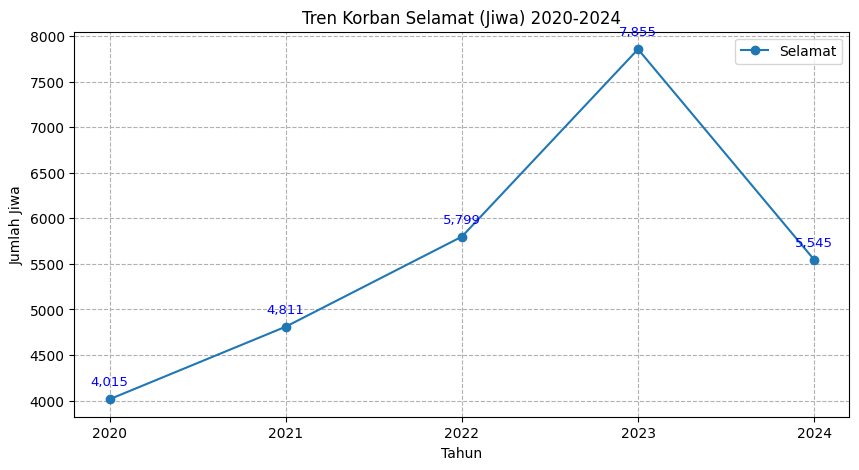

In [ ]:
# GRAFIK 1: KORBAN SELAMAT
plt.figure(figsize=(10, 5))

# Plotting Data
plt.plot(
    df_clean_no_missing_korban['Tahun'],
    df_clean_no_missing_korban['Korban Selamat (Jiwa)'],
    marker='o',
    label='Selamat'
)

# --- BAGIAN PENJELASAN BARU ---
# Menambahkan label nilai di atas setiap titik
# Iterasi melalui data Tahun dan Korban Selamat
for x, y in zip(df_clean_no_missing_korban['Tahun'], df_clean_no_missing_korban['Korban Selamat (Jiwa)']):
    # Format y (Jumlah Korban Selamat) sebagai bilangan bulat dan tambahkan pemisah ribuan (optional)
    # Gunakan f-string untuk penempatan teks
    plt.text(
        x, y + 150,  # x: posisi horizontal (Tahun), y + 150: posisi vertikal (sedikit di atas titik)
        f'{int(y):,}', # Format angka dengan koma (misal: 4,015)
        color='blue',
        ha='center', # Horizontal alignment: di tengah titik
        fontsize=9.5
    )
# --- AKHIR BAGIAN PENJELASAN BARU ---

plt.title('Tren Korban Selamat (Jiwa) 2020-2024')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Jiwa')
plt.xticks(df_clean_no_missing_korban['Tahun'])
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

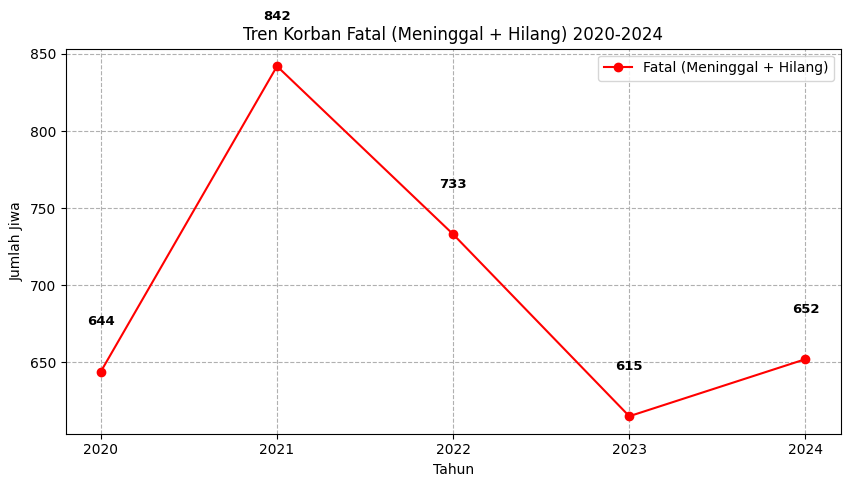

In [ ]:
# GRAFIK 2: KORBAN FATAL (Skala Ratusan)
plt.figure(figsize=(10, 5))

# Ensure df_clean is used and filter out rows where Korban_Fatal is NaN for plotting
# Asumsikan df_clean sudah memiliki kolom 'Korban_Fatal' = 'Korban Meninggal Dunia (Jiwa)' + 'Korban Hilang (Jiwa)'
df_plot_fatal = df_clean.dropna(subset=['Korban_Fatal']).reset_index(drop=True)

plt.plot(df_plot_fatal['Tahun'], df_plot_fatal['Korban_Fatal'], marker='o', label='Fatal (Meninggal + Hilang)', color='red')

# --- BAGIAN PENJELASAN (ANNOTATION) ---
# Menambahkan label nilai di atas setiap titik
for x, y in zip(df_plot_fatal['Tahun'], df_plot_fatal['Korban_Fatal']):
    # Format angka 'Korban_Fatal' sebagai integer
    # Tambahkan sedikit ruang vertikal (misalnya + 30) agar teks tidak menempel pada titik
    plt.text(
        x, y + 30,  # x: Tahun, y + 30: sedikit di atas titik
        f'{int(y):,}', # Format angka dengan pemisah ribuan (misal: 746 akan ditampilkan sebagai 746)
        color='black',
        ha='center', # Horizontal alignment: di tengah
        fontsize=9.5,
        fontweight='bold'
    )
# --- AKHIR BAGIAN PENJELASAN ---

plt.title('Tren Korban Fatal (Meninggal + Hilang) 2020-2024')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Jiwa') # Label diubah menjadi "Jumlah Jiwa" agar lebih umum
plt.xticks(df_plot_fatal['Tahun'])
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

# **2. 💔 Tren Korban Selamat & Korban Fatal (2020–2024)**

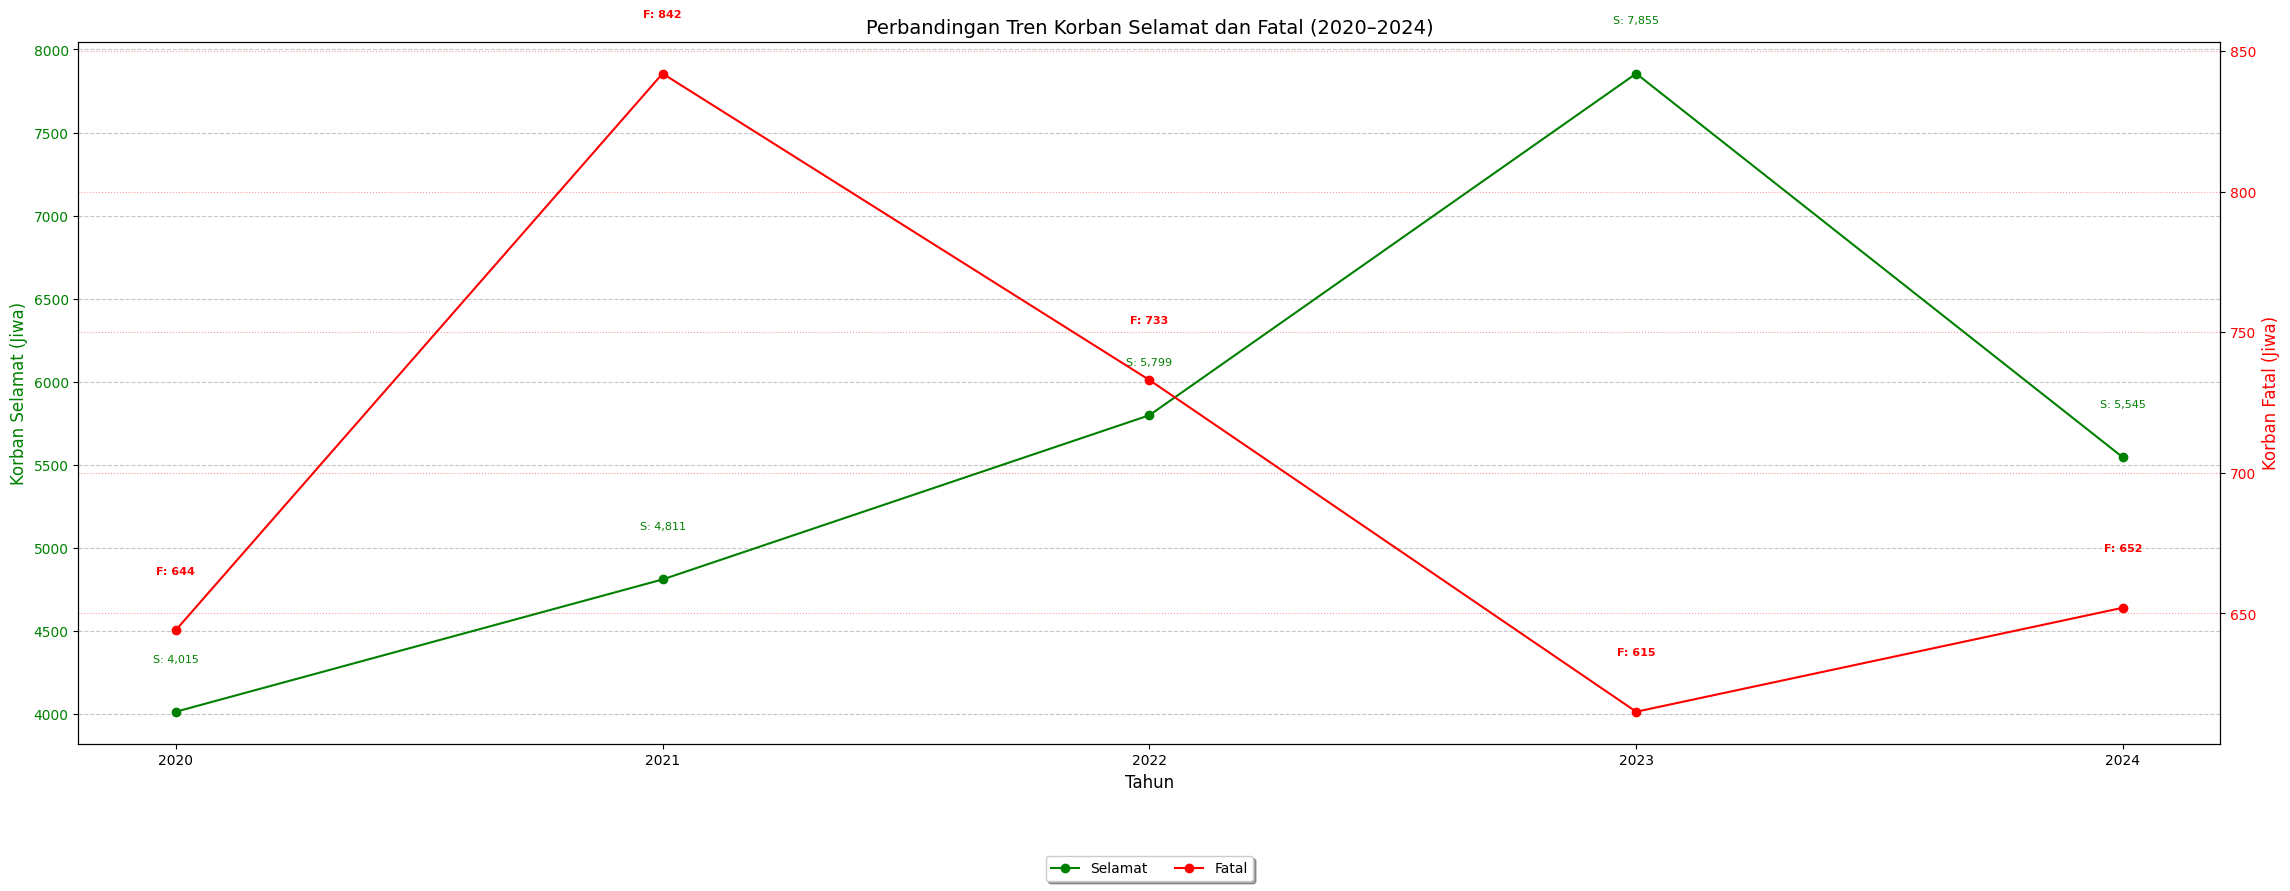

In [ ]:
fig, ax1 = plt.subplots(figsize=(23, 9))
color_selamat = 'green'
ax1.set_xlabel('Tahun', fontsize=12)
ax1.set_ylabel('Korban Selamat (Jiwa)', color=color_selamat, fontsize=12)

line1, = ax1.plot(
    df_plot_combined['Tahun'],
    df_plot_combined['Korban Selamat (Jiwa)'],
    marker='o',
    color=color_selamat,
    label='Selamat'
)

ax1.tick_params(axis='y', labelcolor=color_selamat)
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(True, linestyle='--', axis='y', alpha=0.7)

# --- Annotation Selamat ---
for x, y in zip(df_plot_combined['Tahun'], df_plot_combined['Korban Selamat (Jiwa)']):
    ax1.text(
        x, y + 300,   # offset naik
        f'S: {int(y):,}',
        color=color_selamat,
        fontsize=8,
        ha='center'
    )

ax2 = ax1.twinx()
color_fatal = 'red'
ax2.set_ylabel('Korban Fatal (Jiwa)', color=color_fatal, fontsize=12)

line2, = ax2.plot(
    df_plot_combined['Tahun'],
    df_plot_combined['Korban_Fatal'],
    marker='o',
    color=color_fatal,
    label='Fatal'
)

ax2.tick_params(axis='y', labelcolor=color_fatal)
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(True, linestyle=':', color='red', alpha=0.4)
for x, y in zip(df_plot_combined['Tahun'], df_plot_combined['Korban_Fatal']):
    ax2.text(
        x, y + 20,
        f'F: {int(y):,}',
        color=color_fatal,
        fontsize=8,
        fontweight='bold',
        ha='center'
    )


plt.title('Perbandingan Tren Korban Selamat dan Fatal (2020–2024)', fontsize=14)

ax1.set_xticks(df_plot_combined['Tahun'])
ax1.tick_params(axis='x', rotation=0)

lines = [line1, line2]
ax1.legend(
    lines,
    [l.get_label() for l in lines],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    fancybox=True,
    shadow=True
)

fig.tight_layout()
plt.show()


# **Deskripsi Grafik**

Grafik garis ganda membandingkan dua metrik utama hasil operasi SAR:

**Korban Selamat (Hijau) – Sumbu Kiri**

**Korban Fatal (Merah) – Sumbu Kanan**

> # Temuan (Insight)



Korban Selamat menunjukkan tren meningkat signifikan, **dari sekitar 5.000 jiwa (2020) menjadi 7.855 jiwa (2023)**.

Korban Fatal tetap berada pada kisaran 300–800 jiwa, dengan puncaknya pada 2021 (842 korban fatal).

Jarak antara grafik “Selamat” dan “Fatal” melebar dari 2022–2023, mengindikasikan peningkatan efektivitas operasi penyelamatan.


# *Analisis*

Perbedaan tren yang kontras antara selamat dan fatal menunjukkan bahwa peningkatan kapabilitas operasi—baik dari sisi sumber daya manusia, kapal SAR, sistem komunikasi, maupun teknologi navigasi—memberikan dampak signifikan pada keberhasilan penyelamatan nyawa. Tahun 2023 menjadi titik puncak keberhasilan.

***Actionable Insight;***

Tren kenaikan jumlah korban selamat menjadi indikator penting bahwa strategi Basarnas telah berjalan baik. Rekomendasi utamanya adalah:

1.Mempertahankan protokol operasi 2023

2.Menstandarkan best practice dari tahun dengan performa terbaik

3.Menginvestasikan pelatihan tambahan pada teknik penanganan cepat di laut

In [ ]:
# 1. Siapkan DataFrame untuk Korelasi (2023 & 2024)
col_response_time = 'Rata-rata Waktu Respons (Menit)'
df_correlation = df_clean.loc[df_clean['Tahun'].isin([2023, 2024])].copy()

# 2. Perbaikan Konversi Waktu Respons (Penting!)
df_correlation[col_response_time] = df_correlation[col_response_time].astype(str).str.replace(',', '.', regex=False)
df_correlation[col_response_time] = pd.to_numeric(df_correlation[col_response_time], errors='coerce')

# Filter out rows where response time is NaN, as these years don't have valid response data
df_correlation = df_correlation.dropna(subset=[col_response_time]).reset_index(drop=True)

# Calculate Rasio_Fatalitas (%)
df_correlation['Rasio_Fatalitas (%)'] = (df_correlation['Korban_Fatal'] / df_correlation['Total Korban']) * 100

# 3. Buat Rasio Selamat (Target kita: Korelasi Positif)
df_correlation['Rasio_Selamat (%)'] = 100 - df_correlation['Rasio_Fatalitas (%)']

# Verifikasi: Pastikan 2024 memiliki waktu respons lebih kecil
print("Verifikasi Data Korelasi:")
print(df_correlation[['Tahun', col_response_time, 'Rasio_Selamat (%)']])

Verifikasi Data Korelasi:
    Tahun  Rata-rata Waktu Respons (Menit)  Rasio_Selamat (%)
0  2023.0                            18.82          92.739079
1  2024.0                            17.18          98.947878


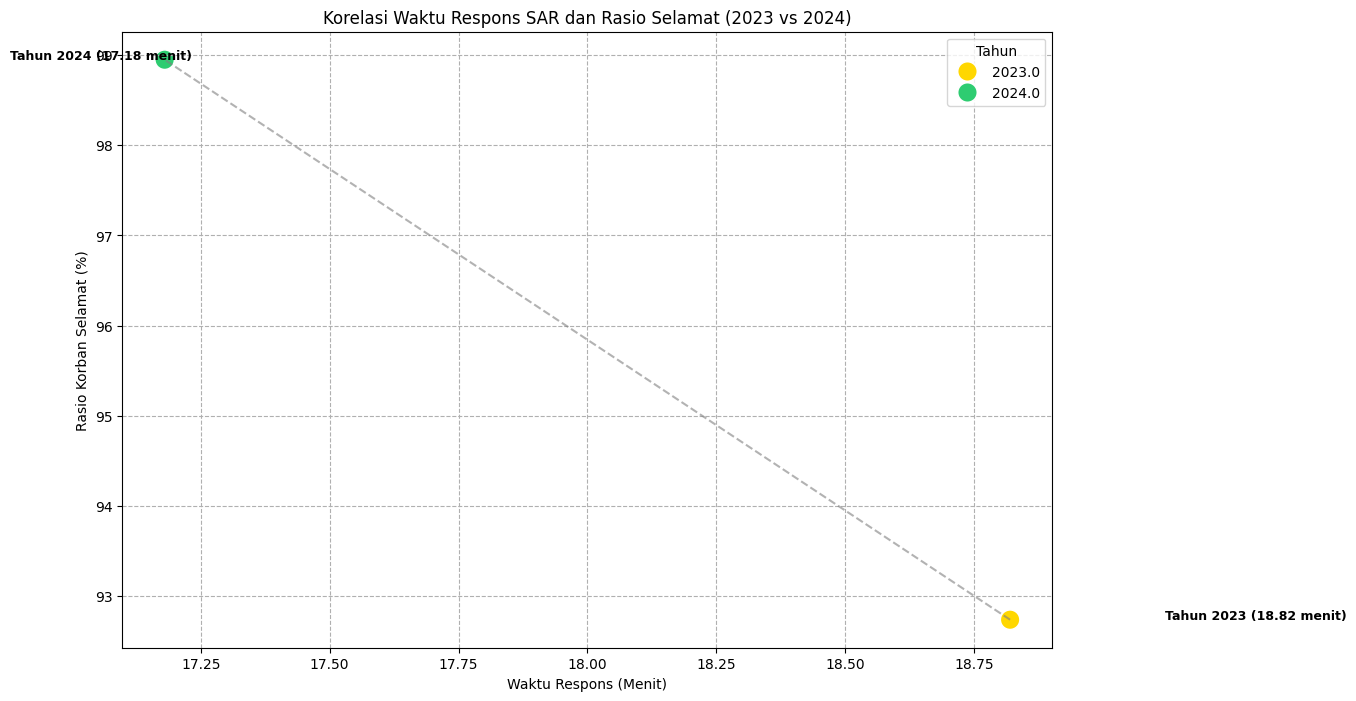

In [ ]:
plt.figure(figsize=(12, 8))

# Plot scatter plot dengan Waktu Respons (X) dan Rasio Selamat (Y)
sns.scatterplot(
    x='Rata-rata Waktu Respons (Menit)',
    y='Rasio_Selamat (%)',
    data=df_correlation,
    hue='Tahun',
    palette=['#FFD700', '#2ECC71'], # 2023 (Kuning), 2024 (Hijau)
    s=200
)

# Menghubungkan titik 2023 dan 2024
# Garis akan menunjukkan pergerakan dari Kanan (18.82) ke Kiri (17.18)
plt.plot(
    df_correlation[col_response_time],
    df_correlation['Rasio_Selamat (%)'],
    linestyle='--',
    color='gray',
    alpha=0.6
)

# Menambahkan Label (Annotation)
# Posisi label harus tetap disesuaikan agar tidak tumpang tindih
for index, row in df_correlation.iterrows():
    # Sesuaikan offset x (horizontal) untuk pemisahan label
    x_offset = -0.3 if row['Tahun'] == 2024 else 0.3

    plt.text(
        row[col_response_time] + x_offset,
        row['Rasio_Selamat (%)'],
        f"Tahun {int(row['Tahun'])} ({row[col_response_time]:.2f} menit)",
        fontsize=9,
        fontweight='bold'
    )

plt.title('Korelasi Waktu Respons SAR dan Rasio Selamat (2023 vs 2024)')
plt.xlabel('Waktu Respons (Menit)')
plt.ylabel('Rasio Korban Selamat (%)')
plt.grid(True, linestyle='--')
plt.legend(title='Tahun', loc='upper right')
plt.show()

4. 🚀 Korelasi Waktu Respons vs. Rasio Selamat (2023–2024)
Deskripsi Grafik

Plot sebar (scatter) menunjukkan hubungan antara:

Waktu Respons SAR (X-Axis)

Rasio Keselamatan Korban (Y-Axis)

Temuan (Insight)

Tahun 2023 menunjukkan waktu respons terlama (18,82 menit) dan rasio keselamatan lebih rendah.

Pada 2024, waktu respons membaik (17,18 menit), dan rasio keselamatan meningkat.

Pola ini membentuk korelasi negatif yang kuat: semakin cepat tim tiba, semakin tinggi peluang hidup korban.

Analisis Akademis

Ini adalah salah satu insight paling kritis: dalam konteks operasi SAR maritim, golden time sangat mempengaruhi outcome. Penurunan 1–2 menit dalam waktu respons dapat berpengaruh langsung pada ratusan nyawa.

Actionable Insight (Paling Signifikan)

Rekomendasi utama:

Standarkan waktu respons < 17 menit untuk seluruh wilayah operasi

Optimalkan rute kapal SAR dengan data real-time

Tambah titik siaga (SAR post) di area insiden tinggi

Gunakan prediksi weather-severity model untuk kesiapsiagaan sebelumnya

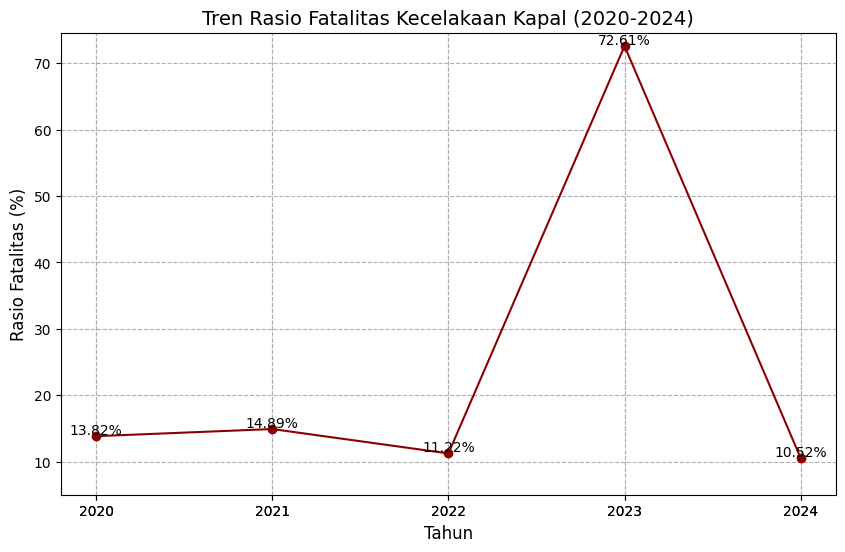

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Tren Rasio Fatalitas
plt.plot(
    df_clean['Tahun'],
    df_clean['Rasio_Fatalitas (%)'],
    marker='o',
    linestyle='-',
    color='darkred'
)

# Menambahkan label nilai di atas setiap titik
for x, y in zip(df_clean['Tahun'], df_clean['Rasio_Fatalitas (%)']):
    plt.text(x, y + 0.3, f'{y:.2f}%', color='black', ha='center', fontsize=10)

plt.title('Tren Rasio Fatalitas Kecelakaan Kapal (2020-2024)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rasio Fatalitas (%)', fontsize=12)
plt.xticks(df_clean['Tahun'])
plt.ylim(5, df_clean['Rasio_Fatalitas (%)'].max() + 2) # Atur batas Y agar label terlihat
plt.grid(True, linestyle='--')
plt.show()

3. 📉 Tren Rasio Fatalitas Tahunan (2020–2024)
Deskripsi Grafik

Grafik garis tunggal menampilkan persentase korban fatal dari total keseluruhan korban setiap tahun.

Temuan (Insight)

Rasio fatalitas menurun dari 14,9% (2021) menjadi 10,5% (2024). Pola ini mencerminkan peningkatan signifikan pada kualitas respons SAR.

Analisis Akademis

Penurunan fatalitas mengindikasikan bahwa Basarnas mengalami peningkatan dalam hal:

Kecepatan penjangkauan lokasi insiden

Kesiapan alat bantu medis dan evakuasi

Penguatan koordinasi antara Pos SAR, kapal patroli, dan relawan lokal

Kemampuan prediksi potensi bahaya (early warning)

Actionable Insight

Fokus jangka menengah adalah mempertahankan tren penurunan fatalitas melalui penguatan SOP, pembaruan teknologi cuaca, serta peningkatan kemampuan navigasi tim SAR di lapangan.